# Predicting Life Expectancy using Machine Learning

A typical Regression Machine Learning project leverages historical data to predict insights into the future. This problem statement is aimed at predicting Life Expectancy rate of a country given various features.

Life expectancy is a statistical measure of the average time a human being is expected to live, Life expectancy depends on various factors: Regional variations, Economic Circumstances, Sex Differences, Mental Illnesses, Physical Illnesses, Education, Year of their birth and other demographic factors. This problem statement provides a way to predict average life expectancy of people living in a country when various factors such as year, GDP, education, alcohol intake of people in the country, expenditure on healthcare system and some specific disease related deaths that happened in the country are given.

Skills required:
Python,IBM Cloud,IBM Watson





In [1]:
#Let's get started

# Installing watson studio client for model building

In [9]:
!pip install watson_machine_learning_client

In [10]:
#import basic libraries for preprocessing and EDA
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format='{:.5f}'.format
import warnings
import math

#import libraries for pipelining
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#import libraries for train and test
from sklearn.model_selection import train_test_split

#import ExtraTreesRegressor for model fit and prediction
from sklearn.ensemble import ExtraTreesRegressor

#import libraries for accuracy and error calculation
from sklearn.metrics import mean_squared_error, r2_score

#import libraries for model building and deployment
from watson_machine_learning_client import WatsonMachineLearningAPIClient

## Importing Dataset

In [11]:
import types
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e4707596b92a4ff98466fe0798510979 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='xpn5iNqiLFxhBI9AHbGcB0kzDNAaljjSPwOQNTx7-xzi',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_e4707596b92a4ff98466fe0798510979.get_object(Bucket='mlpredictinglifeaccuracy-donotdelete-pr-wy1nywsmz65trf',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df=pd.read_csv(body)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.00000,263.00000,62,0.01000,71.27962,65.00000,1154,...,6.00000,8.16000,65.00000,0.10000,584.25921,33736494.00000,17.20000,17.30000,0.47900,10.10000
1,Afghanistan,2014,Developing,59.90000,271.00000,64,0.01000,73.52358,62.00000,492,...,58.00000,8.18000,62.00000,0.10000,612.69651,327582.00000,17.50000,17.50000,0.47600,10.00000
2,Afghanistan,2013,Developing,59.90000,268.00000,66,0.01000,73.21924,64.00000,430,...,62.00000,8.13000,64.00000,0.10000,631.74498,31731688.00000,17.70000,17.70000,0.47000,9.90000
3,Afghanistan,2012,Developing,59.50000,272.00000,69,0.01000,78.18422,67.00000,2787,...,67.00000,8.52000,67.00000,0.10000,669.95900,3696958.00000,17.90000,18.00000,0.46300,9.80000
4,Afghanistan,2011,Developing,59.20000,275.00000,71,0.01000,7.09711,68.00000,3013,...,68.00000,7.87000,68.00000,0.10000,63.53723,2978599.00000,18.20000,18.20000,0.45400,9.50000


## Data Preprocessing

In [12]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [13]:
df=df.rename(columns={'Life expectancy ':'Life expectancy','Measles ':'Measles',' BMI ':'BMI','Diphtheria ':'Diphtheria',' HIV/AIDS':'HIV/AIDS',' thinness  1-19 years':'thinness  1-19 years',' thinness 5-9 years':'thinness 5-9 years'})

In [14]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [15]:
#fill the null values with mean to avoid test and train error
df=df.fillna(df.mean())

In [16]:
#checking for null values
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

# Exploratory data analysis

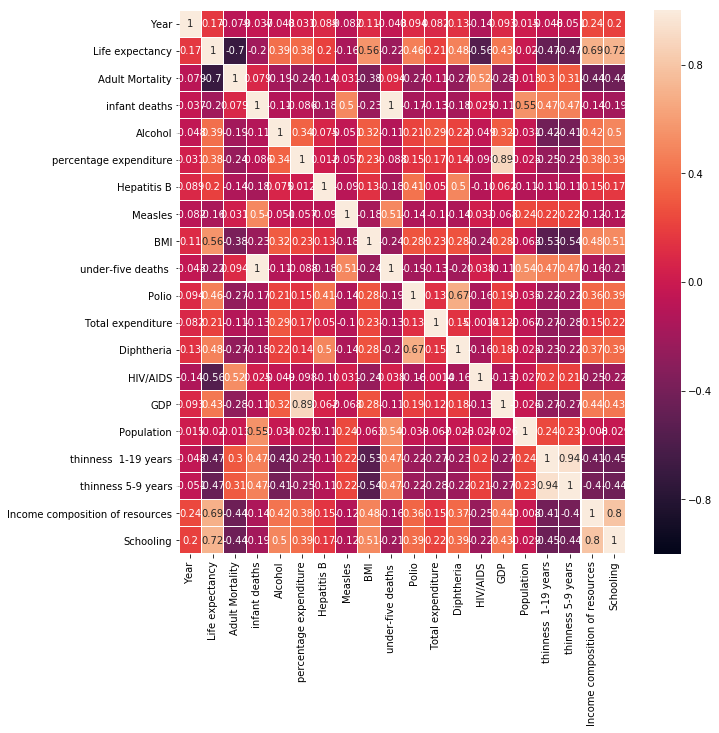

In [17]:
#Ploting heat map to find similar values
df_kor=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_kor,vmin=-1,vmax=1,annot=True,linewidth=0.1)

# Train and Test

In [18]:
#splitting the dataset
Y=df['Life expectancy']
X=df[df.columns.difference(['Life expectancy'])]

In [19]:
#check for numerical columns
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [20]:
df.select_dtypes(include=['object', 'bool']).columns

Index(['Country', 'Status'], dtype='object')

In [21]:
#identify the categorical values for column transform
categorical_features = ['Country', 'Status']
categorical_feature_mask = X.dtypes==object
categorical_features = X.columns[categorical_feature_mask].tolist()
#defne categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),])

In [22]:
#identify the numerical values for column transform 
numeric_features = ['Year','Adult Mortality','infant deaths','Alcohol','percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure','Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years','Income composition of resources', 'Schooling']
numeric_feature_mask = X.dtypes!=object
numeric_features = X.columns[numeric_feature_mask].tolist()
#define numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

In [23]:
#pipelining using columntransform 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [24]:
#define a regressor model using pipeline function
ExtraTreeRegressor = Pipeline([
     ('preprocessor', preprocessor),
     ('ExtraTreeRegressor', ExtraTreesRegressor(n_estimators=100, random_state=0))
])

In [25]:
#train-test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [26]:
#fit the training model
reg = ExtraTreeRegressor.fit(X_train, Y_train)

In [27]:
#predict the test data value
test_pred=reg.predict(X_test)
print(test_pred)

[53.873      72.174      61.769      72.581      57.937      67.332
 60.632      75.639      77.605      74.432      69.84       57.062
 74.685      74.877      74.999      69.45924932 69.401      73.897
 65.097      59.799      53.456      55.538      79.728      59.796
 65.128      76.887      71.01724932 69.253      64.574      65.449
 82.821      85.002      74.226      76.189      74.895      75.144
 55.988      67.577      69.38399727 52.784      79.454      65.349
 73.595      74.124      48.058      73.939      60.238      73.218
 65.914      68.662      72.42       69.191      74.168      62.349
 75.704      79.86       61.392      85.241      74.369      72.758
 61.607      72.457      70.51       54.823      61.758      78.985
 73.262      65.749      59.588      76.751      81.571      66.335
 62.73       74.16       72.23       82.302      82.379      74.117
 62.931      75.686      73.011      62.291      52.256      65.493
 73.638      82.477      48.507      75.264     

In [28]:
#error estimation and accuracy
print('Mean squared error: ',mean_squared_error(Y_test, test_pred))
print('R2 score: ',r2_score(Y_test, test_pred)*100)

Mean squared error:  2.406955514357432
R2 score:  97.25509622378229


# Model Building and Deployment

In [29]:
wml_credentials={ **********************}
client = WatsonMachineLearningAPIClient(wml_credentials)
print(client.service_instance.get_url())

https://us-south.ml.cloud.ibm.com


In [30]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "********", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "**********", 
               client.repository.ModelMetaNames.NAME: "LifeExpectancyPrediction"}
#STORE THE MACHINE LEARNING MODEL
model_artifact=client.repository.store_model(ExtraTreeRegressor, meta_props=model_props)

In [31]:
#GET MODEL UID
model_uid = client.repository.get_model_uid(model_artifact)
#DEPLOY THE MODEL
create_deployment = client.deployments.create(model_uid, name="Predicting Life Expectancy using Machine Learning")



#######################################################################################

Synchronous deployment creation for uid: '9ddba850-9492-464b-91ff-05edadd09be9' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='111bdfb5-b902-478b-ac71-5ab9b5fc5ecb'
------------------------------------------------------------------------------------------------




In [1]:
#GET SCORING END-POINT URL
scoring_endpoint = client.deployments.get_scoring_url(create_deployment)
print(scoring_endpoint)

#removed my scoring end point url because of privacy so getting this error.

NameError: name 'client' is not defined

# The End